In [7]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
import pandas as pd
from src.PLS.ABC import ABC_rejection
from src.PLS.utils import threshold_scheduler
from src.PLS.utils import beta_sampler

In [8]:
Types = ["simple","simple_I0","meta"][2:]
sizes = ["1000","100","10"]
reference = [5]

In [9]:
trajs = 1
iterations = 18
meta_iterations = 900

In [10]:
simple_fittings = {}
simple_fittings["1000"] = {}
simple_fittings["100"] = {}
simple_fittings["10"] = {}
I0_fittings = {}
I0_fittings["1000"] = {}
I0_fittings["100"] = {}
I0_fittings["10"] = {}
meta_fittings = {}
meta_fittings["1000"] = {}
meta_fittings["100"] = {}
meta_fittings["10"] = {}

In [11]:
for Typ in Types:
    if Typ == "simple":
        for siz in sizes:
            if siz == "1000":
                for i in range(1,trajs+1):
                    total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit1000s/Traj_{i}_1_1000b.csv",delimiter=",")
                    print(".",end="")
                    for j in range(2,iterations +1):
                        temp = np.genfromtxt(f"../../../Cluster/fittings/fit1000s/Traj_{i}_{j}_1000b.csv",delimiter=",")
                        total_traj = np.append(temp,total_traj,axis=0)
                    simple_fittings["1000"][f"{i}"] = total_traj
            elif siz == "100":
                for i in range(1,trajs+1):
                    total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit100s/Traj_{i}_1_100b.csv",delimiter=",")
                    print(".",end="")
                    for j in range(2,iterations +1):
                        temp = np.genfromtxt(f"../../../Cluster/fittings/fit100s/Traj_{i}_{j}_100b.csv",delimiter=",")
                        total_traj = np.append(temp,total_traj,axis=0)
                    simple_fittings["100"][f"{i}"] = total_traj
            elif siz == "10":
                for i in range(1,trajs+1):
                    total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit10s/Traj_{i}_1_10b.csv",delimiter=",")
                    print(".",end="")
                    for j in range(2,iterations +1):
                        temp = np.genfromtxt(f"../../../Cluster/fittings/fit10s/Traj_{i}_{j}_10b.csv",delimiter=",")
                        total_traj = np.append(temp,total_traj,axis=0)
                    simple_fittings["10"][f"{i}"] = total_traj
    elif Typ == "simple_I0":
        for siz in sizes:
            if siz == "1000":
                for i in range(1,trajs+1):
                    total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit1000s/Traj_{i}_1_1000b__I1.csv",delimiter=",")
                    print(".",end="")
                    for j in range(2,iterations +1):
                        temp = np.genfromtxt(f"../../../Cluster/fittings/fit1000s/Traj_{i}_{j}_1000b__I1.csv",delimiter=",")
                        total_traj = np.append(temp,total_traj,axis=0)
                    I0_fittings["1000"][f"{i}"] = total_traj
            elif siz == "100":
                for i in range(1,trajs+1):
                    total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit100s/Traj_{i}_1_100b_I1.csv",delimiter=",")
                    print(".",end="")
                    for j in range(2,iterations +1):
                        temp = np.genfromtxt(f"../../../Cluster/fittings/fit100s/Traj_{i}_{j}_100b_I1.csv",delimiter=",")
                        total_traj = np.append(temp,total_traj,axis=0)
                    I0_fittings["100"][f"{i}"] = total_traj
            elif siz == "10":
                for i in range(1,trajs+1):
                    total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit10s/Traj_{i}_1_10b_I1.csv",delimiter=",")
                    print(".",end="")
                    for j in range(2,iterations +1):
                        temp = np.genfromtxt(f"../../../Cluster/fittings/fit10s/Traj_{i}_{j}_10b_I1.csv",delimiter=",")
                        total_traj = np.append(temp,total_traj,axis=0)
                    I0_fittings["10"][f"{i}"] = total_traj
    elif Typ == "meta":
        for siz in sizes:
            if siz == "1000":
                for i in range(1,trajs+1):
                    total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit1000s/Traj_meta_{i}_1_1000b.csv",delimiter=",")
                    print(".",end="")
                    for j in range(2,meta_iterations +1):
                        temp = np.genfromtxt(f"../../../Cluster/fittings/fit1000s/Traj_meta_{i}_{j}_1000b.csv",delimiter=",")
                        total_traj = np.append(temp,total_traj,axis=0)
                        meta_fittings["1000"][f"{i}"] = total_traj
            elif siz == "100":
                for i in range(1,trajs+1):
                        total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit100s/Traj_meta_{i}_1_100b.csv",delimiter=",")
                        print(".",end="")
                        for j in range(2,meta_iterations +1):
                            try:
                                temp = np.genfromtxt(f"../../../Cluster/fittings/fit100s/Traj_meta_{i}_{j}_100b.csv",delimiter=",")
                                total_traj = np.append(temp,total_traj,axis=0)
                                meta_fittings["100"][f"{i}"] = total_traj
                            except:
                                print(f"{j} is missing!")
            elif siz == "10":
                for i in range(1,trajs+1):
                    total_traj = np.genfromtxt(f"../../../Cluster/fittings/fit10s/Traj_meta_{i}_1_10b.csv",delimiter=",")
                    print(".",end="")
                    for j in range(2,meta_iterations +1):
                        temp = np.genfromtxt(f"../../../Cluster/fittings/fit10s/Traj_meta_{i}_{j}_10b.csv",delimiter=",")
                        total_traj = np.append(temp,total_traj,axis=0)
                    meta_fittings["10"][f"{i}"] = total_traj

......

     Beta  Counts
0    1.00       0
1    1.01       0
2    1.02       0
3    1.03       0
4    1.04       0
..    ...     ...
188  9.95       0
189  9.96       0
190  9.97       0
191  9.98       0
192  9.99       0

[859 rows x 2 columns]
     Beta  Counts
0    1.00       0
1    1.01       0
2    1.02       0
3    1.03       0
4    1.04       0
..    ...     ...
668  9.89       1
669  9.90       1
670  9.91       1
671  9.92       1
672  9.97       1

[881 rows x 2 columns]
     Beta  Counts
0    1.00       0
1    1.01       0
2    1.02       0
3    1.03       0
4    1.04       0
..    ...     ...
763  9.95     930
764  9.96     943
765  9.97     921
766  9.98     969
767  9.99     947

[804 rows x 2 columns]


C:\Users\ollie\AppData\Local\Temp\ipykernel_3052\2898395100.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


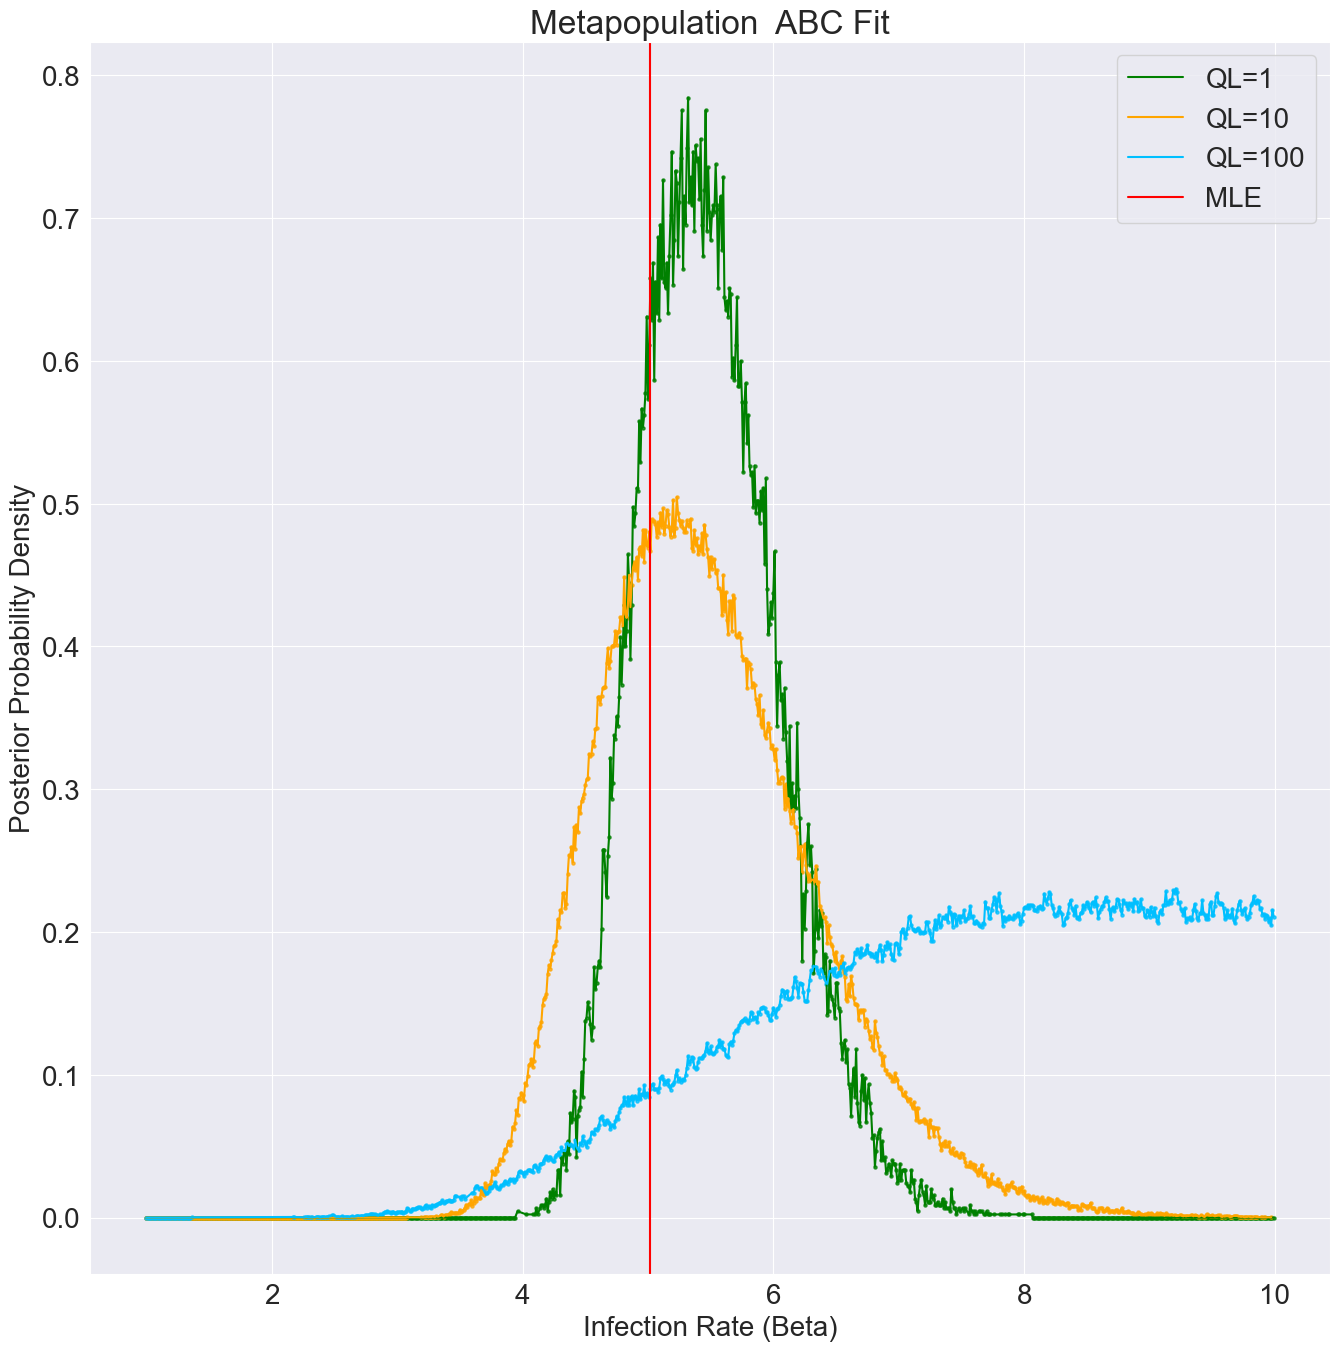

     Beta  Counts
0    1.00       0
1    1.01       0
2    1.02       0
3    1.03       0
4    1.04       0
..    ...     ...
188  9.95       0
189  9.96       0
190  9.97       0
191  9.98       0
192  9.99       0

[859 rows x 2 columns]
     Beta  Counts
0    1.00       0
1    1.01       0
2    1.02       0
3    1.03       0
4    1.04       0
..    ...     ...
668  9.89       1
669  9.90       1
670  9.91       1
671  9.92       1
672  9.97       1

[881 rows x 2 columns]
     Beta  Counts
0    1.00       0
1    1.01       0
2    1.02       0
3    1.03       0
4    1.04       0
..    ...     ...
763  9.95     930
764  9.96     943
765  9.97     921
766  9.98     969
767  9.99     947

[804 rows x 2 columns]


C:\Users\ollie\AppData\Local\Temp\ipykernel_3052\2898395100.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


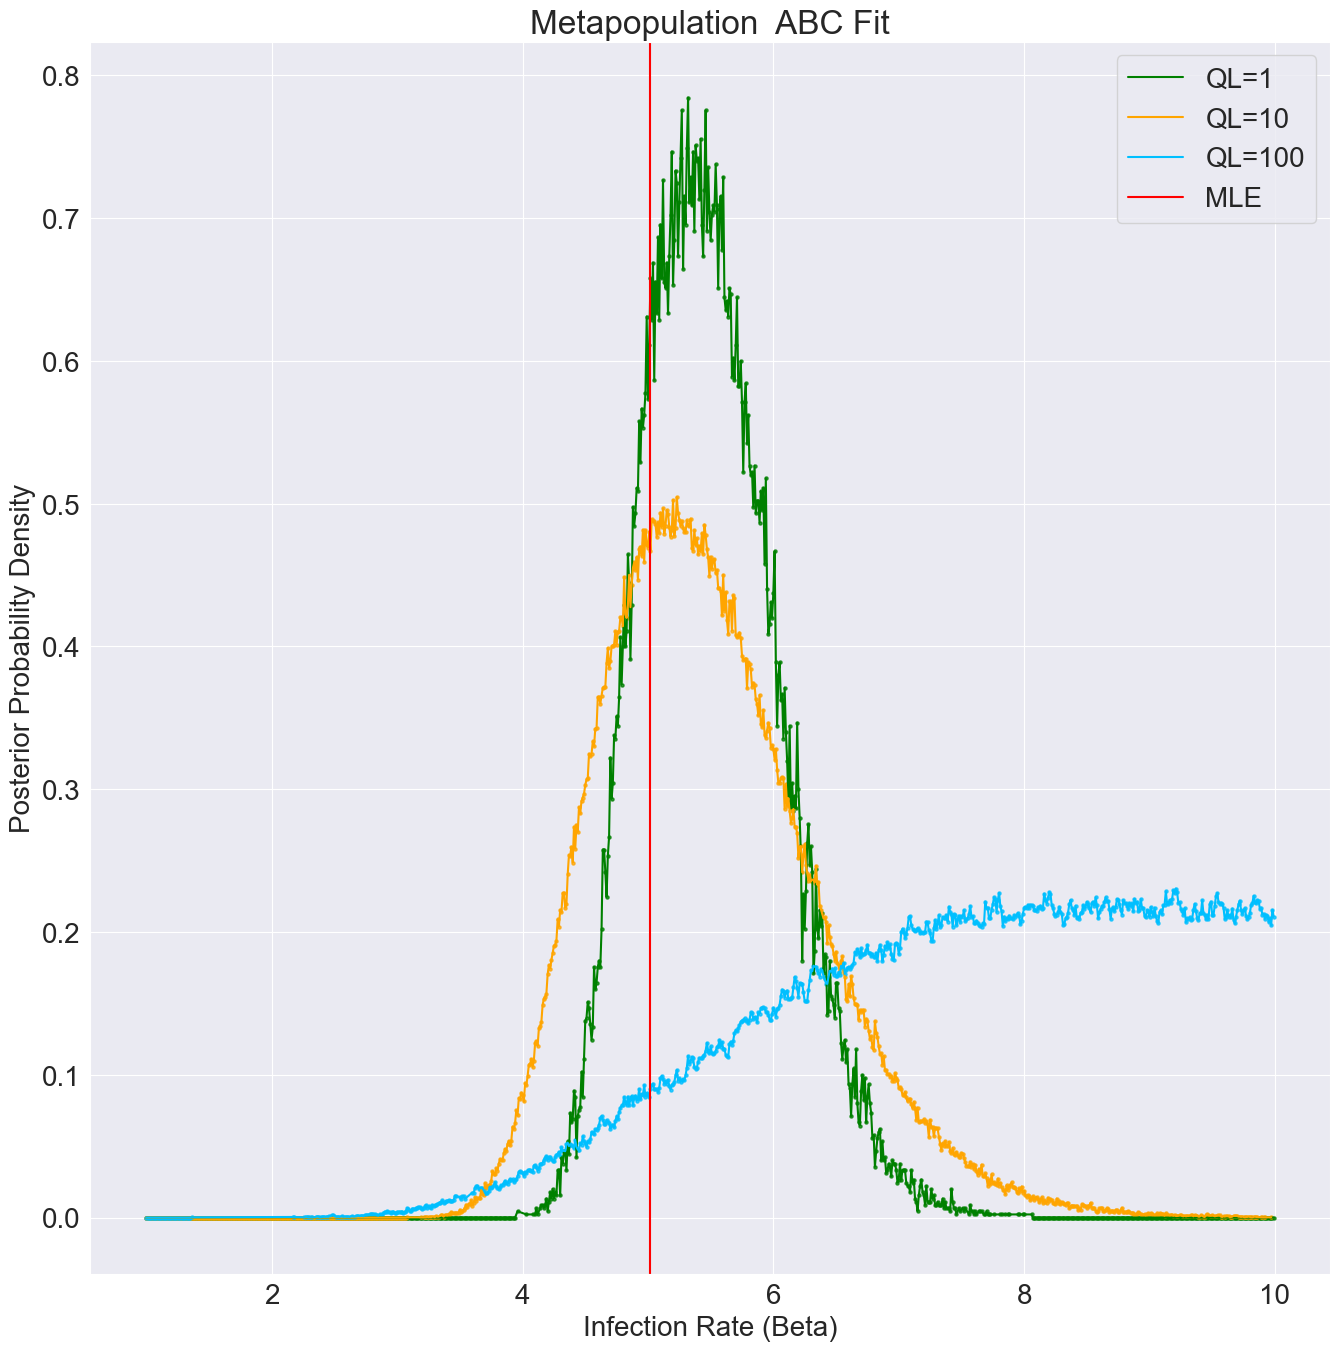

In [13]:
#Plot Graph!!!!
fig, ax0 = plt.subplots(figsize=(16, 16))
#Prepare Data for graphing
counter = -1
font = {'size': 20}
plt.rc('font', **font)
colours = ['green','orange',"deepskyblue"]#
ax0.set_prop_cycle('color', colours)
for Typ in Types:
    counter +=1
    for siz in sizes:
        if Typ == "simple":
            graph_ABC = simple_fittings[f"{siz}"]["1"]
        elif Typ == "simple_I0":
            graph_ABC = I0_fittings[f"{siz}"]["1"]
        elif Typ == "meta":
            graph_ABC = meta_fittings[f"{siz}"]["1"]
        df_ABC = pd.DataFrame(graph_ABC, columns=["Beta", "Distance"])
        threshold_schedule = threshold_scheduler(df_ABC, reference)
        for i in range(len(threshold_schedule)):
            thresh = ABC_rejection(threshold_schedule[i], graph_ABC)
            ploted = pd.DataFrame(thresh, columns=["Beta", "Counts"])
            bet_dis = ploted.groupby("Beta").count()
            plot_bet_dis = bet_dis.reset_index()
            if np.round(min(plot_bet_dis["Beta"]),2) > 1:
                mins = np.arange(1,np.round(min(plot_bet_dis["Beta"]),2)-0.01,0.01)
                df_mins =pd.DataFrame({"Beta": mins, "Counts": [0]*len(mins)})
                plot_bet_dis = pd.concat([plot_bet_dis,df_mins])
            if np.round(max(plot_bet_dis["Beta"]),2) < 9.9:
                maxs = np.arange(np.round(max(plot_bet_dis["Beta"]),2)+0.01,10,0.01)
                df_maxs =pd.DataFrame({"Beta": maxs, "Counts": [0]*len(maxs)})
                plot_bet_dis = pd.concat([plot_bet_dis,df_maxs])

            plot_bet_dis = plot_bet_dis.sort_values("Beta",ascending=True)
            print(plot_bet_dis)
            max_scale = max(plot_bet_dis["Counts"])
            plot_bet_dis["Counts"] = plot_bet_dis["Counts"] / max_scale
            area = np.trapz(plot_bet_dis["Counts"],dx=0.01)
            plot_bet_dis["Counts"] = plot_bet_dis["Counts"] / area
            spline = sp.interpolate.CubicSpline(plot_bet_dis["Beta"], plot_bet_dis["Counts"])
            print(spline)
            ax0.scatter(plot_bet_dis["Beta"], plot_bet_dis["Counts"],
                        alpha=0.75,s=5)
            ax0.plot(plot_bet_dis["Beta"], spline(plot_bet_dis["Beta"]),label=f"QL={int(1000/int(siz))}")
    if Typ == "simple":
        mles = np.genfromtxt("../../../Data/R0_3/Fitted/MLE_b_3.csv")[0]
    elif Typ == "simple_I0":
        mles = np.genfromtxt("../../../Data/R0_3/Fitted/MLE_b_I0_1_3.csv")[0]
    elif Typ == "meta":
        mles = np.genfromtxt("../../../Data/R0_5/Fitted/MLE_meta_b.csv")
    ax0.set_ylabel("Posterior Probability Density")
    ax0.set_xlabel("Infection Rate (Beta)")
    ax0.set_title(f'{["SIR; I(0)=0.1N","SIR; I(0)=1", "Metapopulation  ABC Fit"][2]}')
    ax0.axvline(mles, color="red",label="MLE")
ax0.legend(bbox_to_anchor=(1, 1))
fig.show()